Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 1.6 MB/s 
     |████████████████████████████████| 6.4 MB 12.6 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.28.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.
[*********************100%***********************]  3 of 3 completed


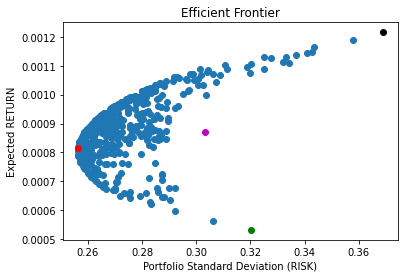

In [2]:
# Program_9c.ipynb: Modern Portfolio Theory.
!pip install yfinance
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
df=yf.download(['AAPL','CAT','GOOG'],start="2000-12-01",end="2020-12-01")
df=np.log(1+df['Adj Close'].pct_change()) # Normalized Portfolio Returnsdf.drop('Date', axis=1, inplace=True)#
df.to_csv('Portfolio_Data.csv')
def PR(weights): # Portfolio Return
  return np.dot(df.mean(),weights)
def PSTD(weights): # Portfolio STD
  return (np.dot(np.dot(df.cov(),weights),weights))**(1/2)*np.sqrt(250) 
  # Annualize STD, 250 trading days.
def RW(df): # Random Weights
  rand=np.random.random(len(df.columns))
  rand /= rand.sum()
  return rand
returns , stds , w = [] ,[] ,[]
for i in range(500):   # Why 500?
  weights=RW(df)
  returns.append(PR(weights))
  stds.append(PSTD(weights))
  w.append(weights)
plt.scatter(stds,returns)
plt.scatter(df.std().iloc[0]*np.sqrt(250),df.mean().iloc[0],c='k')
plt.scatter(df.std().iloc[1]*np.sqrt(250),df.mean().iloc[1],c='g')
plt.scatter(df.std().iloc[2]*np.sqrt(250),df.mean().iloc[2],c='m')
plt.scatter(min(stds),returns[stds.index(min(stds))],c='r')
plt.title('Efficient Frontier')
plt.xlabel('Portfolio Standard Deviation (RISK)')
plt.ylabel('Expected RETURN')
plt.show()